In [41]:
import polars as pl
from polars import DataFrame
from pathlib import Path

COLLECTED_DATA = Path("data/collected-gemini-2.5-pro-N100-edGcOddc.csv")
# COLLECTED_DATA = Path("collected-gemini-2.5-flash.csv")

In [42]:
df = pl.read_csv(COLLECTED_DATA)
assert isinstance(df, DataFrame)

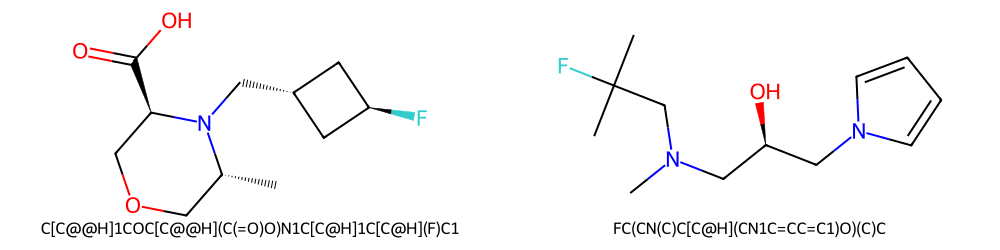

Morgan Fingerprint Tanimoto Similarity: 0.079


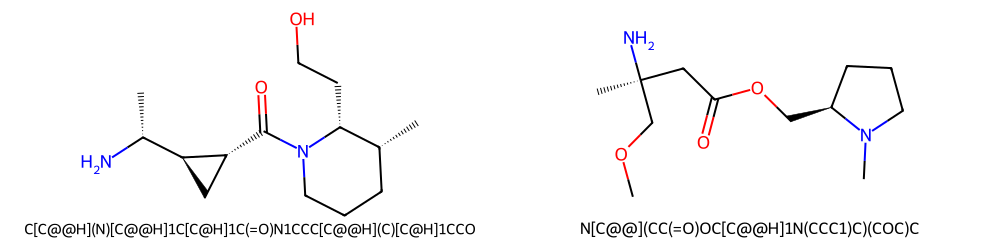

Morgan Fingerprint Tanimoto Similarity: 0.167


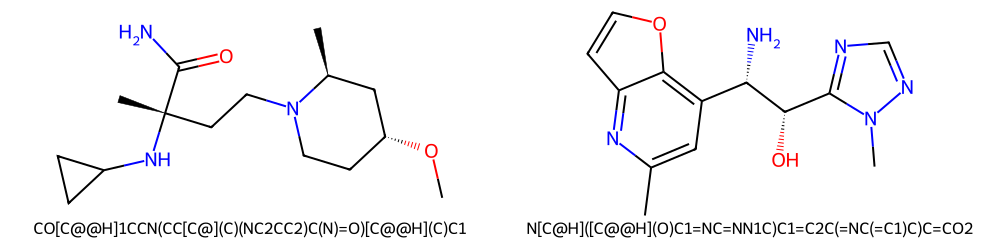

Morgan Fingerprint Tanimoto Similarity: 0.047


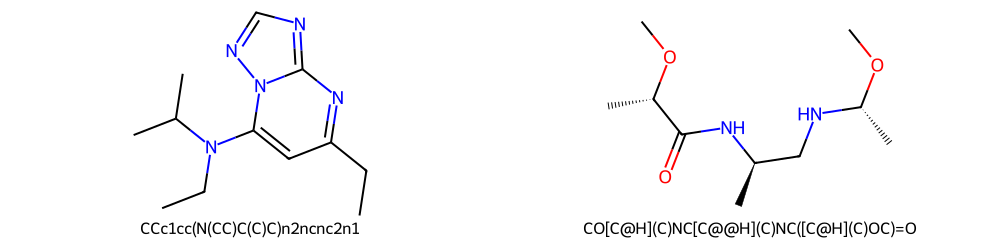

Morgan Fingerprint Tanimoto Similarity: 0.053


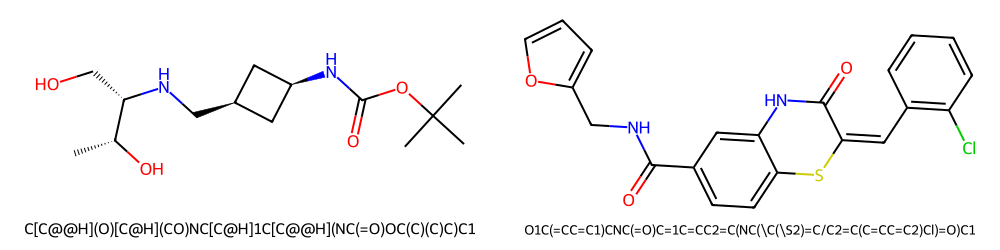

Morgan Fingerprint Tanimoto Similarity: 0.076


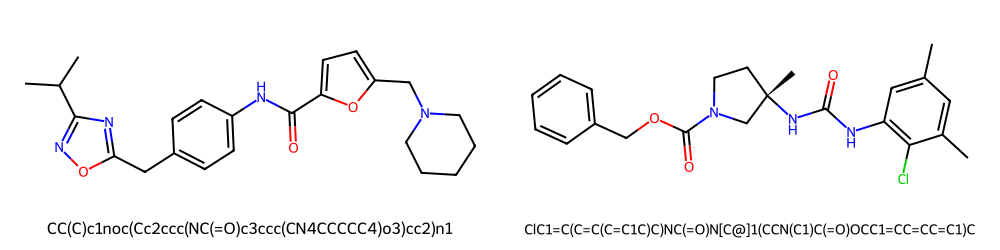

Morgan Fingerprint Tanimoto Similarity: 0.109


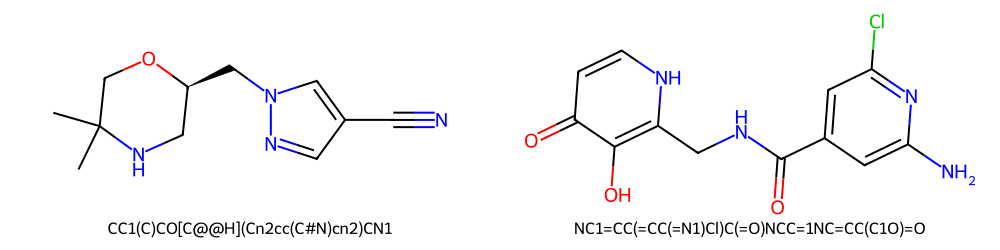

Morgan Fingerprint Tanimoto Similarity: 0.059


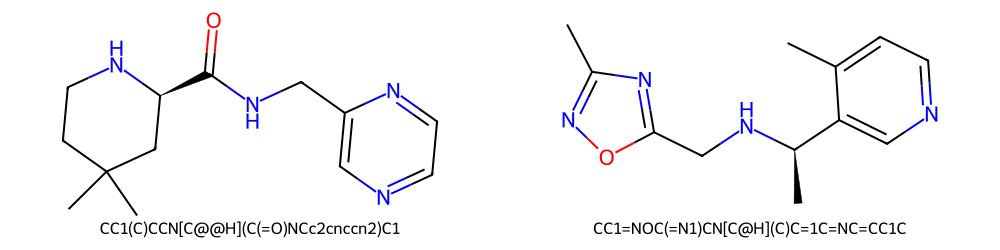

Morgan Fingerprint Tanimoto Similarity: 0.120


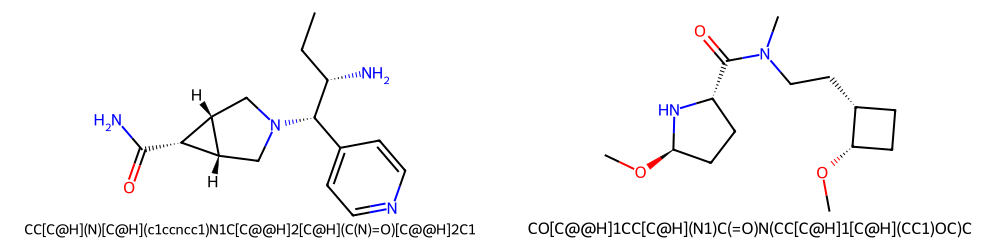

Morgan Fingerprint Tanimoto Similarity: 0.078


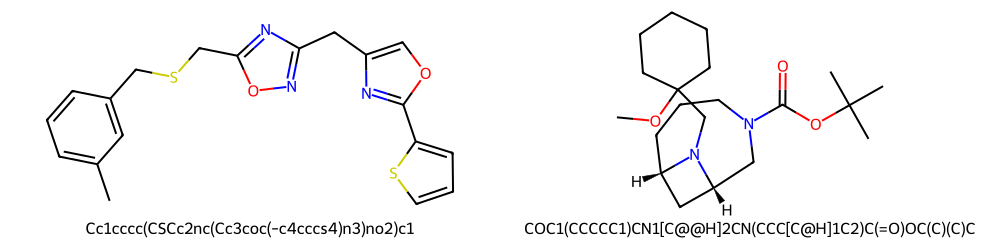

Morgan Fingerprint Tanimoto Similarity: 0.054


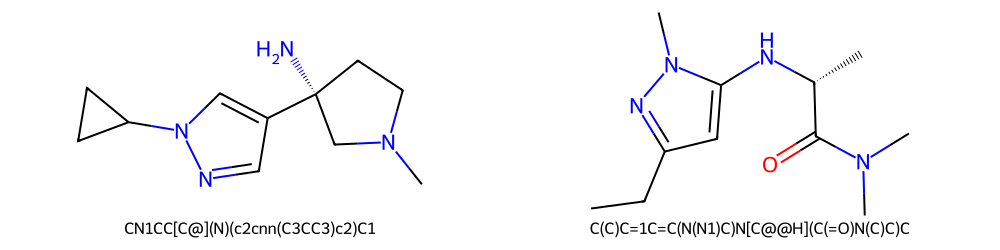

Morgan Fingerprint Tanimoto Similarity: 0.087


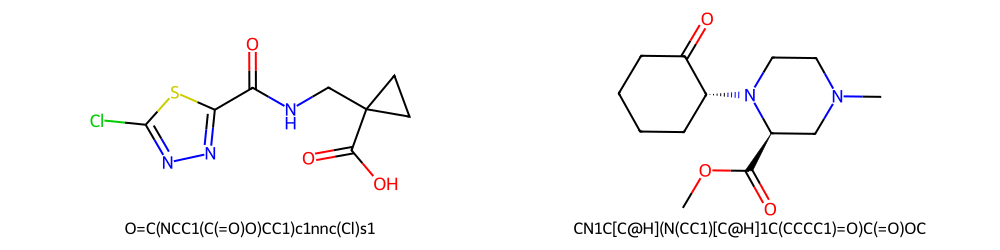

Morgan Fingerprint Tanimoto Similarity: 0.071


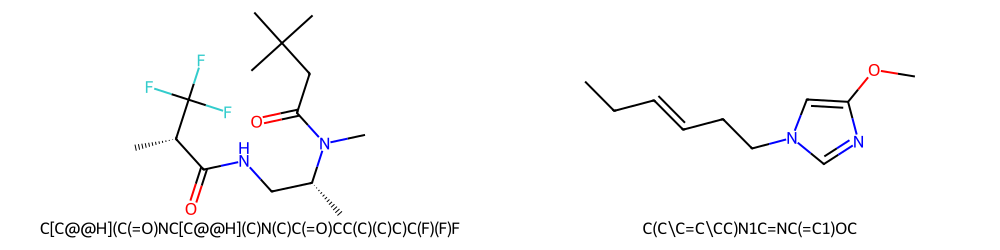

Morgan Fingerprint Tanimoto Similarity: 0.038


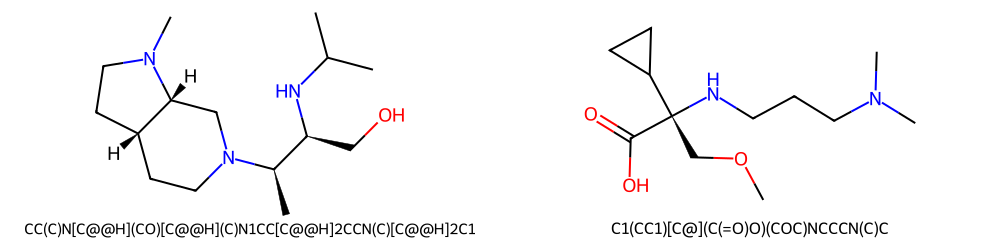

Morgan Fingerprint Tanimoto Similarity: 0.083


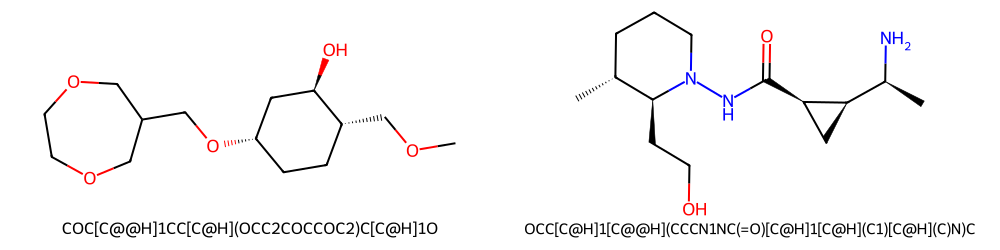

Morgan Fingerprint Tanimoto Similarity: 0.086


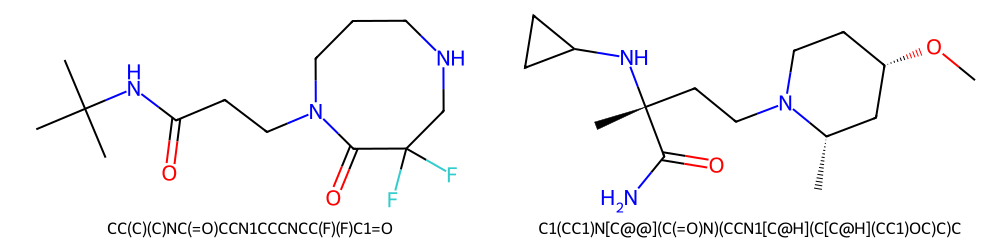

Morgan Fingerprint Tanimoto Similarity: 0.140


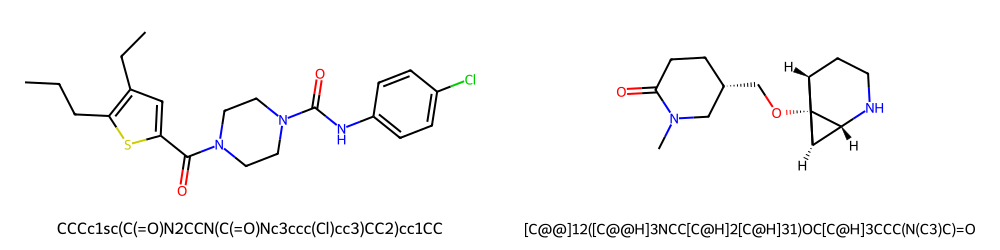

Morgan Fingerprint Tanimoto Similarity: 0.064


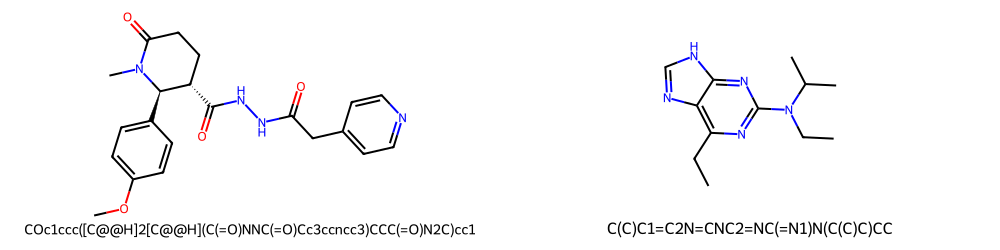

Morgan Fingerprint Tanimoto Similarity: 0.094


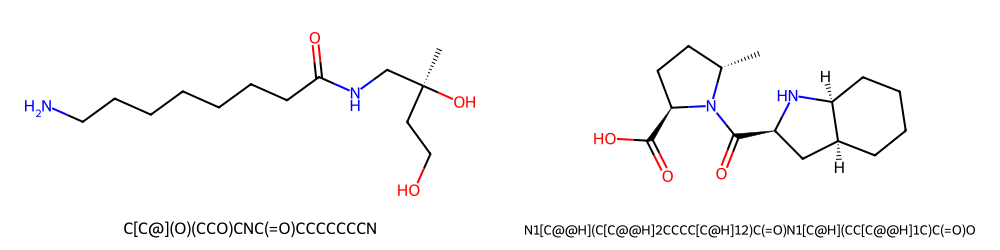

Morgan Fingerprint Tanimoto Similarity: 0.068


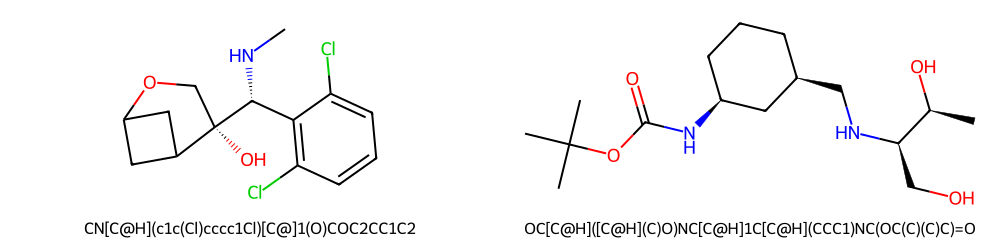

Morgan Fingerprint Tanimoto Similarity: 0.073


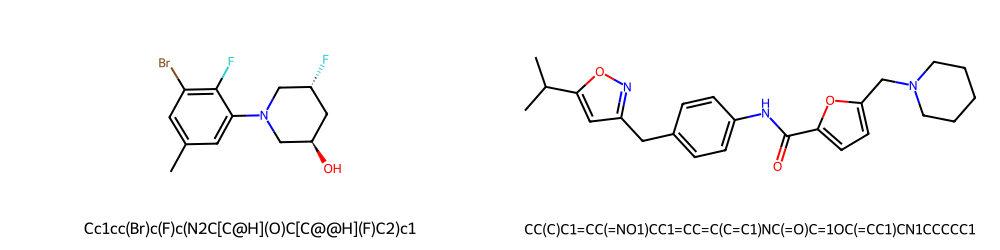

Morgan Fingerprint Tanimoto Similarity: 0.073


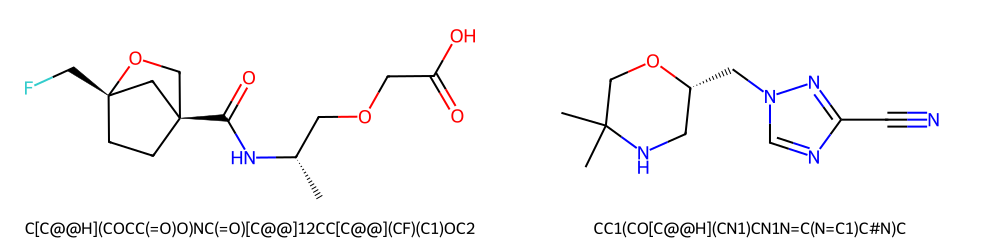

Morgan Fingerprint Tanimoto Similarity: 0.095


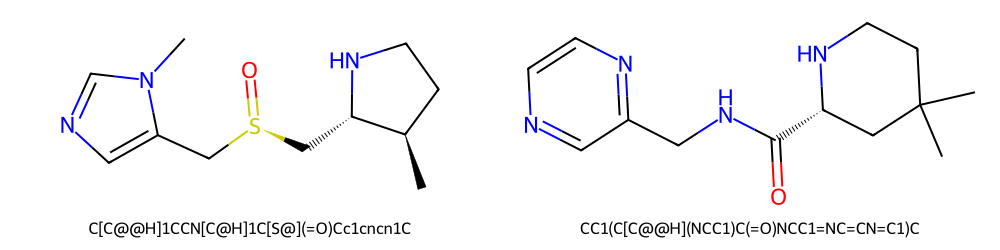

Morgan Fingerprint Tanimoto Similarity: 0.144


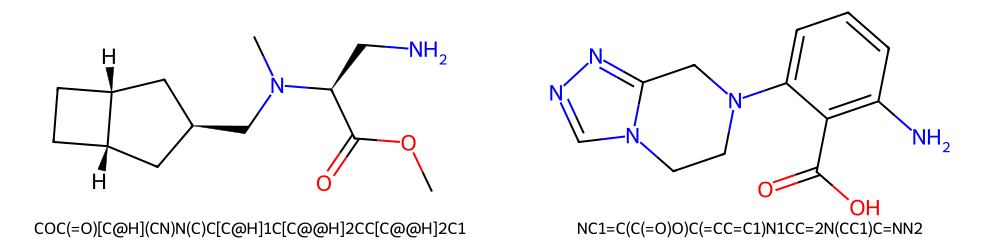

Morgan Fingerprint Tanimoto Similarity: 0.055


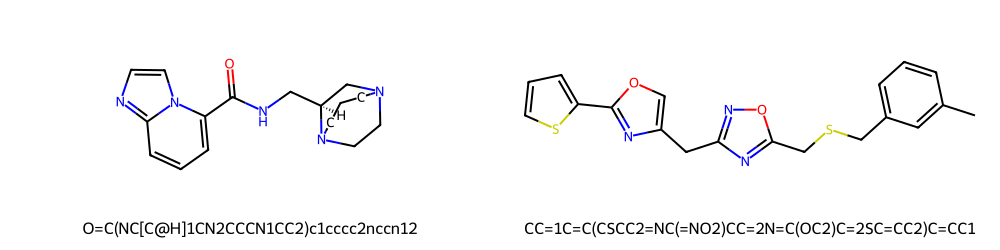

Morgan Fingerprint Tanimoto Similarity: 0.051


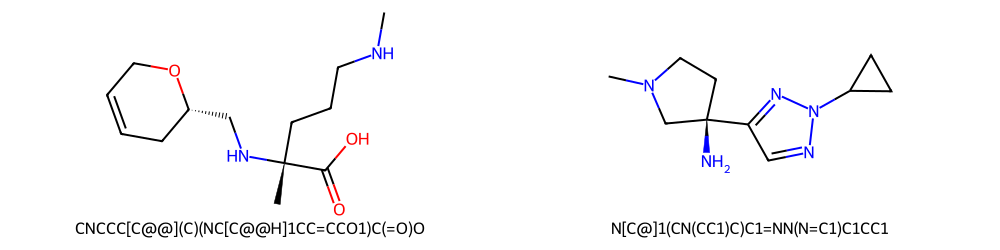

Morgan Fingerprint Tanimoto Similarity: 0.056


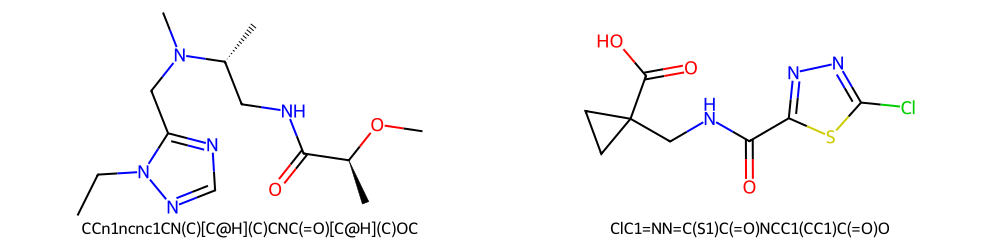

Morgan Fingerprint Tanimoto Similarity: 0.089


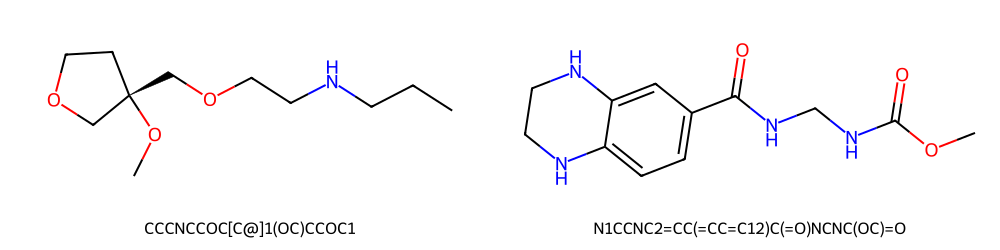

Morgan Fingerprint Tanimoto Similarity: 0.081


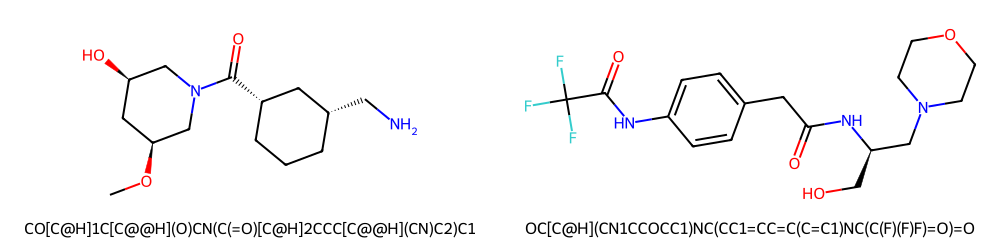

Morgan Fingerprint Tanimoto Similarity: 0.056


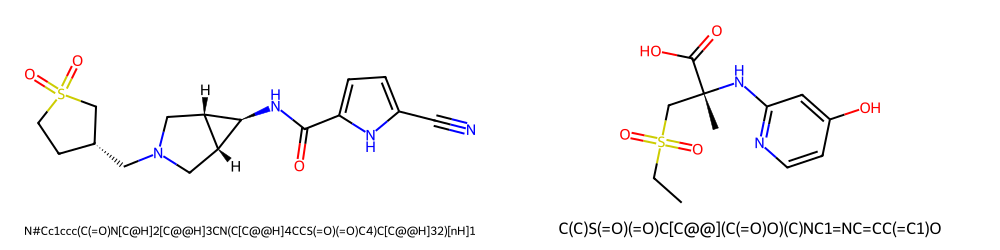

Morgan Fingerprint Tanimoto Similarity: 0.098


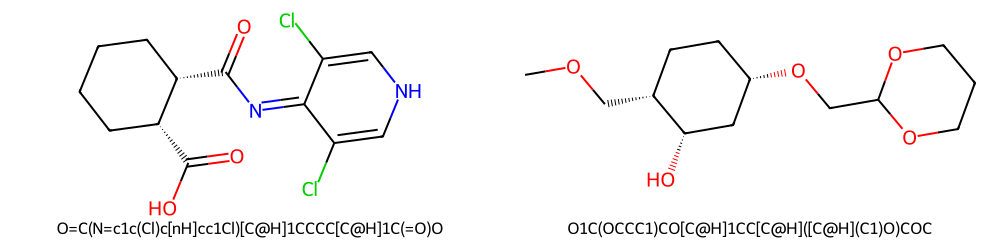

Morgan Fingerprint Tanimoto Similarity: 0.060


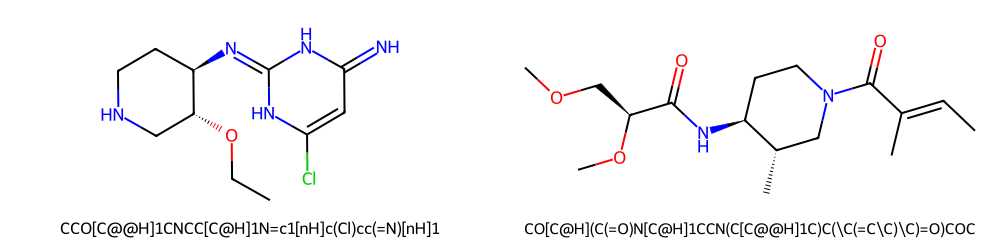

Morgan Fingerprint Tanimoto Similarity: 0.067


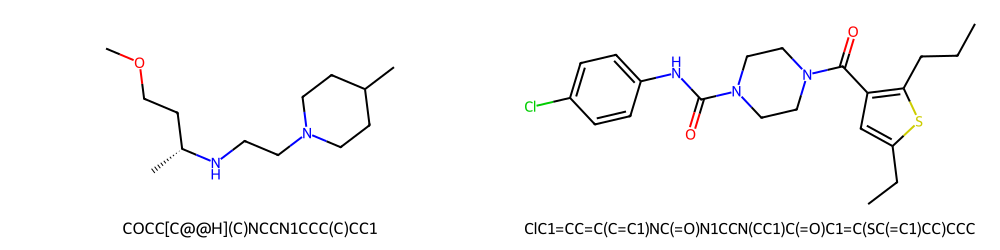

Morgan Fingerprint Tanimoto Similarity: 0.092


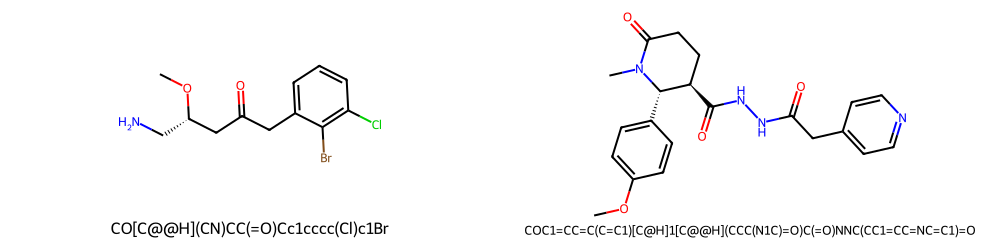

Morgan Fingerprint Tanimoto Similarity: 0.123


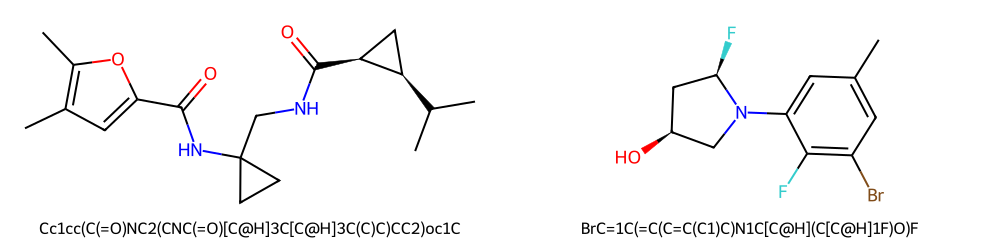

Morgan Fingerprint Tanimoto Similarity: 0.097


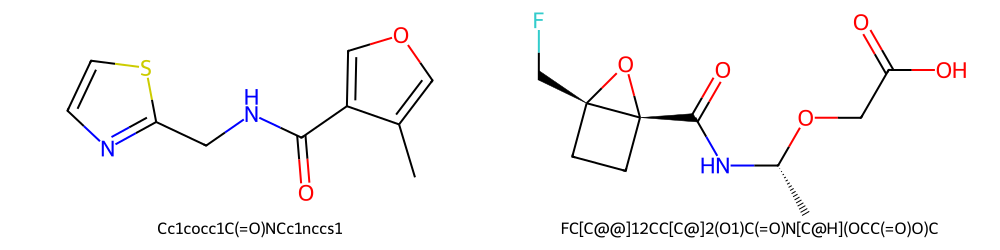

Morgan Fingerprint Tanimoto Similarity: 0.083


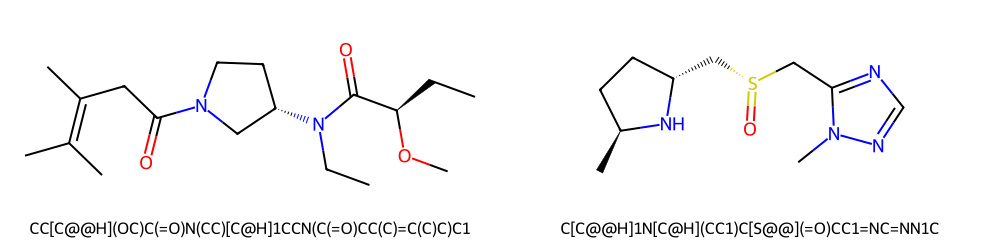

Morgan Fingerprint Tanimoto Similarity: 0.084


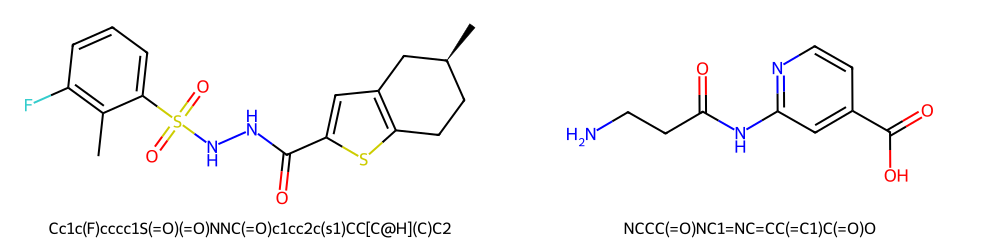

Morgan Fingerprint Tanimoto Similarity: 0.097


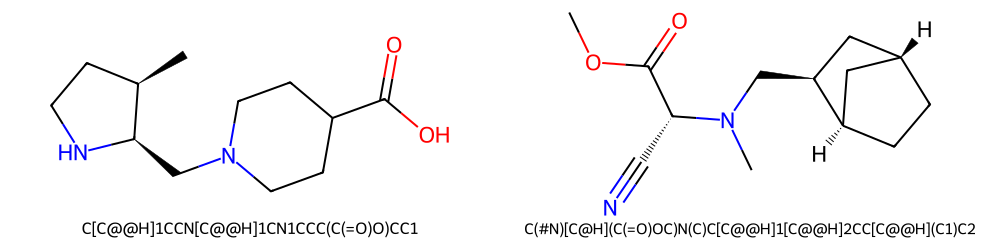

Morgan Fingerprint Tanimoto Similarity: 0.101


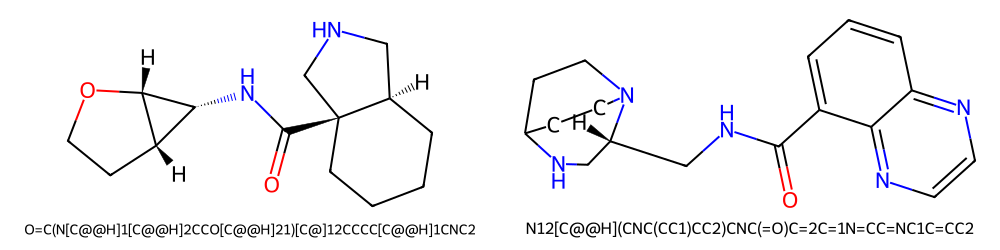

Morgan Fingerprint Tanimoto Similarity: 0.080


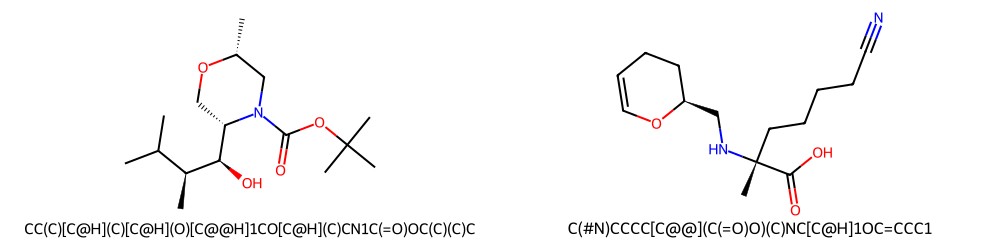

Morgan Fingerprint Tanimoto Similarity: 0.117


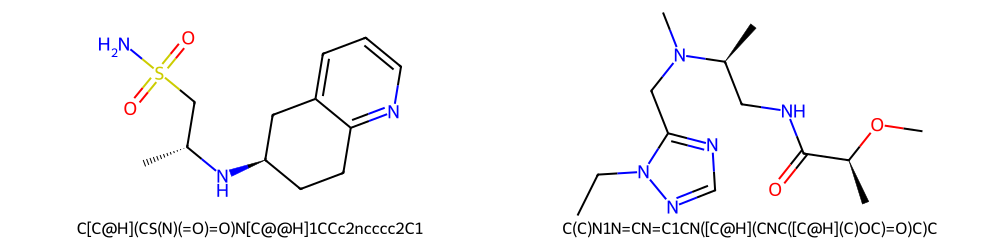

Morgan Fingerprint Tanimoto Similarity: 0.098


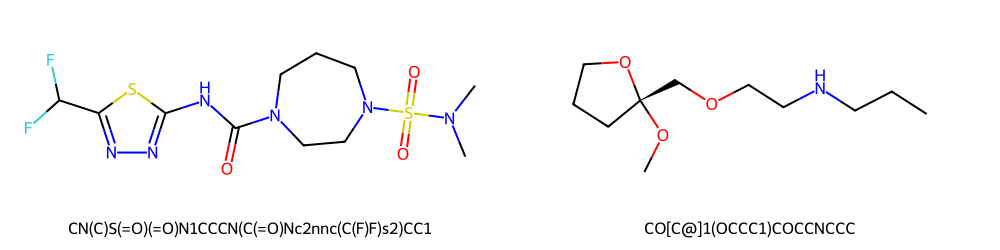

Morgan Fingerprint Tanimoto Similarity: 0.051


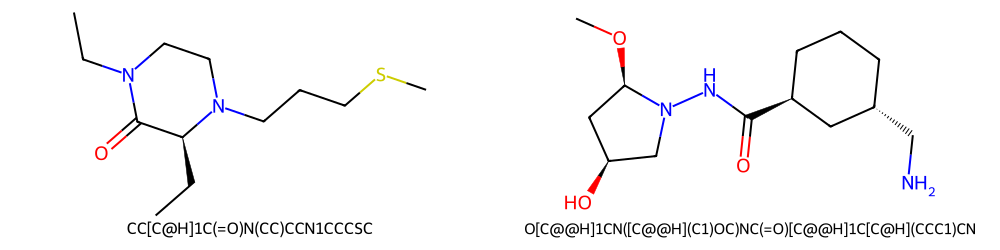

Morgan Fingerprint Tanimoto Similarity: 0.066


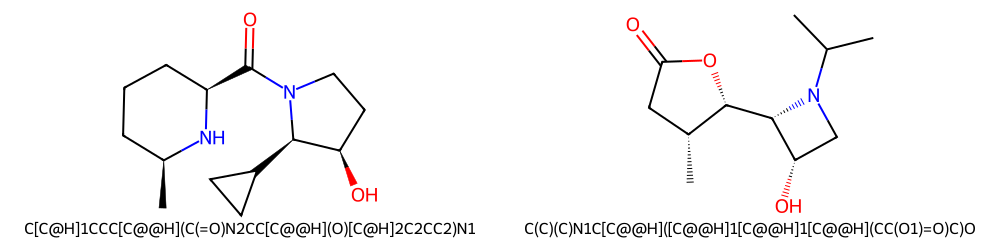

Morgan Fingerprint Tanimoto Similarity: 0.132


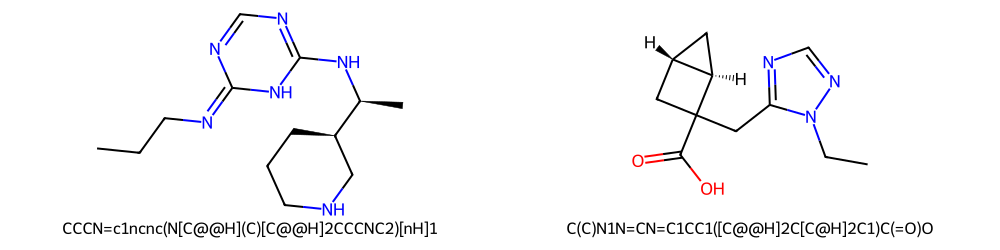

Morgan Fingerprint Tanimoto Similarity: 0.152


In [46]:
# validate smiles
from IPython.display import display
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator

fpgen = rdFingerprintGenerator.GetMorganGenerator()

tanimoto_similarity: list[int | float | None] = []
for mol in df.rows():
    original_smiles, iupac, opsin_smiles, errors = mol
    if errors:
        tanimoto_similarity.append(None)
        continue
    original_mol = Chem.MolFromSmiles(original_smiles)
    opsin_mol = Chem.MolFromSmiles(opsin_smiles)
    original_fp = fpgen.GetFingerprint(original_mol)
    opsin_fp = fpgen.GetFingerprint(opsin_mol)
    sim = DataStructs.TanimotoSimilarity(original_fp, opsin_fp)
    tanimoto_similarity.append(sim)
    display(
        Draw.MolsToGridImage(
            mols=[original_mol, opsin_mol],
            legends=[
                original_smiles,
                opsin_smiles,
            ],
            molsPerRow=2,
            subImgSize=(500, 250),
        )
    )
    print(f"Morgan Fingerprint Tanimoto Similarity: {sim:.3f}")

df = df.with_columns(pl.Series(name="MFTS", values=tanimoto_similarity))

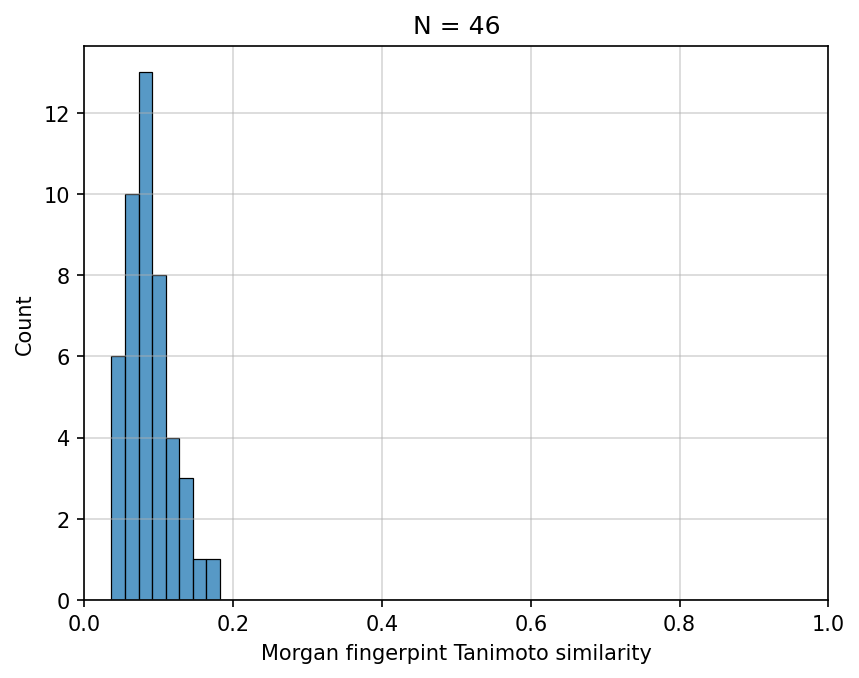

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6.4, 4.8), dpi=150)
sns.histplot(df, x="MFTS", bins="auto", binrange=(0, 1), zorder=1, ax=ax)
plt.grid(alpha=0.5)
plt.title(f"N = {len([t for t in tanimoto_similarity if t is not None])}")
plt.xlabel("Morgan fingerpint Tanimoto similarity")
plt.xlim(0, 1)
plt.show()